In [154]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Four in a row Agent and Environment

This is an implementation of a rational agents for the game four in a row.

## 1. Definition of the Environment

- States: The environment is in one of the following states $S = (S_0, S_1, ..., S_w)$ with $S_x = (S_{x,0}, S_{x,1}, ..., S_{x,h})$ and $S_{x,y} \in \{E, R, Y\}$.
- Actions: The set of  available actions: $a \in \{n \in \mathbb{N}: (|E \in S_n| > 0)\}$ (the agent can place their chip in any non-full column).
- Transitions: The transition depends on the opponent's strategy. If we assume the opponent plays randomly then the probability of them picking a viable column is $\dfrac{1}{nr\;of\;valid\;columns}$

The `FourInARowEnv` class has the following methods:
- `reset()` resets the environment's state to it's initial state.
- `step(action)` processes the action of the agent.
- `render()` displays the state using box characters.
- `get_state()` returns the current state.
- `is_done()` checks if there is a winner of if the board is full.

To allow an agent to calculate optimal decisions using model information, these methods are also available:
- `get_possible_states()` calculates all possible future states.
- `get_reward_for_state(state)` simplified version $R(s)$ of the general reward function: $R(s, a, s')$.
- `get_transition_prob(action, new_state, old_state)` $P(s' \mid s, a)$.
- `get_possible_actions(action)` returns the possible actions.
- `get_possible_states_after_action(action)` calculates the possible states after an action.


### 1.1 Definition of an agent

Agents have access to the environment they play in and what player they play as. An agent has only 1 method named `get_move`. `get_move` is responsible for calculating the optimal action and returning it.


## 2. Environment Creation

We are able to create an environment with several parameters:

- `yellow_agent` is used to define an agent that will act as the opponent.
- `width` the width of the playing field.
- `height` the height of the playing field.
- `win_conditions` the number of chips in a row required to win.
- `first_turn` the player that will play first.


In [155]:
from src import FourInARowEnv, Players, render_multiple_states, BoxState, FourInARowRenderer,FourInARowGraphCreator
from src.agents import FourInARowRandomAgent, FourInARowMinMaxAgent, FourInARowValueIterationAgent, FourInARowSemiRandomAgent
from copy import deepcopy

In [156]:
environment = FourInARowEnv(
  yellow_agent  = FourInARowRandomAgent,
  width         = 3,
  height        = 3,
  win_condition = 3,
  first_turn    = Players.RED
)

### 2.1 Displaying the board

The board is displayed using box characters. The letter `Y` represents a yellow chip, and the letter `R` represents a red one.

In [157]:
red_agent = FourInARowRandomAgent(environment)

environment.step(red_agent.get_move())

print(environment.render())

┌───┬───┬───┐
│   │   │   │
├───┼───┼───┤
│   │   │   │
├───┼───┼───┤
│ Y │ R │   │
└───┴───┴───┘


## 3. Actions and probability

### 3.1 Possible states and actions



In [158]:
environment.reset()

display = render_multiple_states(
  states          = environment.get_possible_states()[0:16], 
  columns         = 8, 
  additional_info = lambda s: f'a: {environment.get_possible_actions(s)}\nf: {s.is_finished()}'
)

print(display)

┌───┬───┬───┐ ┌───┬───┬───┐ ┌───┬───┬───┐ ┌───┬───┬───┐ ┌───┬───┬───┐ ┌───┬───┬───┐ ┌───┬───┬───┐ ┌───┬───┬───┐
│   │   │   │ │   │   │   │ │ R │   │   │ │ R │   │   │ │ R │   │   │ │ R │ Y │   │ │ R │ Y │   │ │ R │   │   │
├───┼───┼───┤ ├───┼───┼───┤ ├───┼───┼───┤ ├───┼───┼───┤ ├───┼───┼───┤ ├───┼───┼───┤ ├───┼───┼───┤ ├───┼───┼───┤
│   │   │   │ │ Y │   │   │ │ Y │   │   │ │ Y │   │   │ │ Y │ R │   │ │ Y │ R │   │ │ Y │ R │   │ │ Y │ R │   │
├───┼───┼───┤ ├───┼───┼───┤ ├───┼───┼───┤ ├───┼───┼───┤ ├───┼───┼───┤ ├───┼───┼───┤ ├───┼───┼───┤ ├───┼───┼───┤
│ R │   │   │ │ R │   │   │ │ R │   │   │ │ R │ Y │   │ │ R │ Y │   │ │ R │ Y │   │ │ R │ Y │ R │ │ R │ Y │ Y │
└───┴───┴───┘ └───┴───┴───┘ └───┴───┴───┘ └───┴───┴───┘ └───┴───┴───┘ └───┴───┴───┘ └───┴───┴───┘ └───┴───┴───┘
 a: [0, 1, 2]  a: [0, 1, 2]  a: [1, 2]     a: [1, 2]     a: [1, 2]     a: [2]        a: [2]        a: [1, 2]   
 f: False      f: False      f: False      f: False      f: False      f: False      f: True       f: Fa

### 3.2 Transition probability

In [159]:
env = FourInARowEnv(
  yellow_agent  = FourInARowRandomAgent,
  width         = 2,
  height        = 2,
  win_condition = 2,
  first_turn    = Players.RED
)
s0 = deepcopy(env._state)
s1 = deepcopy(s0)
s1._grid = [
  [BoxState.RED   , BoxState.YELLOW],
  [BoxState.EMPTY , BoxState.EMPTY ]
]
s2 = deepcopy(s0)
s2._grid = [
  [BoxState.RED   , BoxState.EMPTY],
  [BoxState.YELLOW, BoxState.EMPTY]
]
s3 = deepcopy(s0)
s3._grid = [
  [BoxState.RED    , BoxState.YELLOW],
  [BoxState.EMPTY  , BoxState.EMPTY ]
]
s4 = deepcopy(s0)
s4._grid = [
  [BoxState.RED    , BoxState.EMPTY ],
  [BoxState.EMPTY  , BoxState.YELLOW]
]

print('Start state:')
print(FourInARowRenderer(s0).render())

display = render_multiple_states(
  states          = [s1, s2, s3, s4],
  columns         = 8,
  additional_info = lambda s: f'Action 0\np: {round(env.get_transition_prob(0, s, s0), 2)}'
)

print('\nNew state:')
print(display)


Start state:
┌───┬───┐
│   │   │
├───┼───┤
│   │   │
└───┴───┘

New state:
┌───┬───┐ ┌───┬───┐ ┌───┬───┐ ┌───┬───┐
│ Y │   │ │   │   │ │ Y │   │ │   │ Y │
├───┼───┤ ├───┼───┤ ├───┼───┤ ├───┼───┤
│ R │   │ │ R │ Y │ │ R │   │ │ R │   │
└───┴───┘ └───┴───┘ └───┴───┘ └───┴───┘
 Action 0  Action 0  Action 0  Action 0
 p: 0.5    p: 0.5    p: 0.5    p: 0.0  




In [160]:
env = FourInARowEnv(
  yellow_agent  = FourInARowRandomAgent,
  width         = 2,
  height        = 2,
  win_condition = 2,
  first_turn    = Players.RED
)
s0 = deepcopy(env._state)
s0._grid = [
  [BoxState.RED   , BoxState.EMPTY ],
  [BoxState.YELLOW, BoxState.EMPTY ]
]
s1 = deepcopy(s0)
s1._grid = [
  [BoxState.RED   , BoxState.RED],
  [BoxState.YELLOW, BoxState.EMPTY ]
]
s2 = deepcopy(s0)
s2._grid = [
  [BoxState.RED   , BoxState.RED   ],
  [BoxState.YELLOW, BoxState.YELLOW]
]

print('Start state:')
print(FourInARowRenderer(s0).render())

display = render_multiple_states(
  states          = [s1, s2],
  columns         = 8,
  additional_info = lambda s: f'Action 0\np: {round(env.get_transition_prob(0, s, s0), 2)}'
)

print('\nNew state:')
print(display)


Start state:
┌───┬───┐
│   │   │
├───┼───┤
│ R │ Y │
└───┴───┘

New state:
┌───┬───┐ ┌───┬───┐
│ R │   │ │ R │ Y │
├───┼───┤ ├───┼───┤
│ R │ Y │ │ R │ Y │
└───┴───┘ └───┴───┘
 Action 0  Action 0
 p: 1.0    p: 0.0  




### 3.3 Rewards

The reward model is very basic. If the player wins the reward will result in 1 and if the opponent wins it results in a -1. For neutral states it will return 0.


In [161]:
env = FourInARowEnv(
  yellow_agent  = FourInARowRandomAgent,
  width         = 2,
  height        = 2,
  win_condition = 2,
  first_turn    = Players.RED
)
s0 = deepcopy(env._state)
s0._grid = [
  [BoxState.RED   , BoxState.EMPTY ],
  [BoxState.YELLOW, BoxState.EMPTY ]
]
s1 = deepcopy(s0)
s1._grid = [
  [BoxState.RED   , BoxState.RED],
  [BoxState.YELLOW, BoxState.EMPTY ]
]
s2 = deepcopy(s0)
s2._grid = [
  [BoxState.RED   , BoxState.EMPTY  ],
  [BoxState.YELLOW, BoxState.YELLOW ]
]

display = render_multiple_states(
  states          = [s0, s1, s2],
  columns         = 8,
  additional_info = lambda s: f'r: {env.get_reward_for_state(s, Players.RED)}'
)
print('Rewards for player red:')
print(display)

Rewards for player red:
┌───┬───┐ ┌───┬───┐ ┌───┬───┐
│   │   │ │ R │   │ │   │ Y │
├───┼───┤ ├───┼───┤ ├───┼───┤
│ R │ Y │ │ R │ Y │ │ R │ Y │
└───┴───┘ └───┴───┘ └───┴───┘
 r: 0      r: 1      r: -1   




## 4 Agents


### 4.1 Random
This agent will simply choose a valid action at random regardless of state.

In [162]:
env = FourInARowEnv(
  yellow_agent  = FourInARowRandomAgent,
  width         = 3,
  height        = 3,
  win_condition = 3,
  first_turn    = Players.RED
)

agent = FourInARowRandomAgent(env)

states = []
states.append(deepcopy(env.get_state()))
while not env.is_done():
  env.step(agent.get_move())
  states.append(deepcopy(env.get_state()))

display = render_multiple_states(
  states = states,
  columns = 8,
  additional_info = lambda _: ''
)
print(display)

┌───┬───┬───┐ ┌───┬───┬───┐ ┌───┬───┬───┐ ┌───┬───┬───┐ ┌───┬───┬───┐ ┌───┬───┬───┐
│   │   │   │ │   │   │   │ │   │   │   │ │   │ R │ Y │ │   │ R │ Y │ │ R │ R │ Y │
├───┼───┼───┤ ├───┼───┼───┤ ├───┼───┼───┤ ├───┼───┼───┤ ├───┼───┼───┤ ├───┼───┼───┤
│   │   │   │ │   │   │   │ │   │ Y │ R │ │   │ Y │ R │ │ Y │ Y │ R │ │ Y │ Y │ R │
├───┼───┼───┤ ├───┼───┼───┤ ├───┼───┼───┤ ├───┼───┼───┤ ├───┼───┼───┤ ├───┼───┼───┤
│   │   │   │ │   │ R │ Y │ │   │ R │ Y │ │   │ R │ Y │ │ R │ R │ Y │ │ R │ R │ Y │
└───┴───┴───┘ └───┴───┴───┘ └───┴───┴───┘ └───┴───┴───┘ └───┴───┴───┘ └───┴───┴───┘
                                                                                   




### 4.2 Semi-random
This agent's policy is almost identical to the random agent's policy with one exception: it will look 1 step ahead. It will score if it is only one step away from winning, similarly it will block the opponent if they are one step away from winning.

In [163]:
env = FourInARowEnv(
  yellow_agent  = FourInARowRandomAgent,
  width         = 3,
  height        = 3,
  win_condition = 3,
  first_turn    = Players.RED
)

agent = FourInARowSemiRandomAgent(env)

states = []
states.append(deepcopy(env.get_state()))
while not env.is_done():
  env.step(agent.get_move())
  states.append(deepcopy(env.get_state()))

display = render_multiple_states(
  states = states,
  columns = 8,
  additional_info = lambda _: ''
)
print(display)

┌───┬───┬───┐ ┌───┬───┬───┐ ┌───┬───┬───┐ ┌───┬───┬───┐ ┌───┬───┬───┐ ┌───┬───┬───┐
│   │   │   │ │   │   │   │ │   │   │   │ │   │   │   │ │ R │   │ Y │ │ R │ R │ Y │
├───┼───┼───┤ ├───┼───┼───┤ ├───┼───┼───┤ ├───┼───┼───┤ ├───┼───┼───┤ ├───┼───┼───┤
│   │   │   │ │   │   │   │ │ Y │   │   │ │ Y │ Y │ R │ │ Y │ Y │ R │ │ Y │ Y │ R │
├───┼───┼───┤ ├───┼───┼───┤ ├───┼───┼───┤ ├───┼───┼───┤ ├───┼───┼───┤ ├───┼───┼───┤
│   │   │   │ │ R │   │ Y │ │ R │ R │ Y │ │ R │ R │ Y │ │ R │ R │ Y │ │ R │ R │ Y │
└───┴───┴───┘ └───┴───┴───┘ └───┴───┴───┘ └───┴───┴───┘ └───┴───┴───┘ └───┴───┴───┘
                                                                                   




### 4.3 Brute-force

The brute-force agent will walk through all possibilities when making a move and returns the action that yields the highest reward. This will result in the best results but will not work for environments that could go on forever.


In [173]:
env = FourInARowEnv(
  yellow_agent  = FourInARowRandomAgent,
  width         = 3,
  height        = 3,
  win_condition = 3,
  first_turn    = Players.RED
)

agent = FourInARowMinMaxAgent(env)

states = []
states.append(deepcopy(env.get_state()))
while not env.is_done():
  env.step(agent.get_move())
  states.append(deepcopy(env.get_state()))

display = render_multiple_states(
  states = states,
  columns = 8,
  additional_info = lambda _: ''
)
print(display)

┌───┬───┬───┐ ┌───┬───┬───┐ ┌───┬───┬───┐ ┌───┬───┬───┐
│   │   │   │ │   │   │   │ │   │   │   │ │ R │   │   │
├───┼───┼───┤ ├───┼───┼───┤ ├───┼───┼───┤ ├───┼───┼───┤
│   │   │   │ │   │   │   │ │ R │ Y │   │ │ R │ Y │   │
├───┼───┼───┤ ├───┼───┼───┤ ├───┼───┼───┤ ├───┼───┼───┤
│   │   │   │ │ R │ Y │   │ │ R │ Y │   │ │ R │ Y │   │
└───┴───┴───┘ └───┴───┴───┘ └───┴───┴───┘ └───┴───┴───┘
                                                       




### 4.4 Value Iteration

The value iteration agent uses value iteration to solve Bellman's equation. It will compute the utility for every state at creation and will use it in the future to make decisions.

In [ ]:
env = FourInARowEnv(
  yellow_agent  = FourInARowRandomAgent,
  width         = 3,
  height        = 3,
  win_condition = 3,
  first_turn    = Players.RED
)

agent = FourInARowValueIterationAgent(env)

states = []
states.append(deepcopy(env.get_state()))
while not env.is_done():
  env.step(agent.get_move())
  states.append(deepcopy(env.get_state()))

display = render_multiple_states(
  states = states,
  columns = 8,
  additional_info = lambda _: ''
)
print(display)

┌───┬───┬───┐ ┌───┬───┬───┐ ┌───┬───┬───┐ ┌───┬───┬───┐ ┌───┬───┬───┐ ┌───┬───┬───┐
│   │   │   │ │   │   │   │ │   │   │ R │ │   │   │ R │ │   │ Y │ R │ │ R │ Y │ R │
├───┼───┼───┤ ├───┼───┼───┤ ├───┼───┼───┤ ├───┼───┼───┤ ├───┼───┼───┤ ├───┼───┼───┤
│   │   │   │ │   │   │ Y │ │   │   │ Y │ │   │ R │ Y │ │ R │ R │ Y │ │ R │ R │ Y │
├───┼───┼───┤ ├───┼───┼───┤ ├───┼───┼───┤ ├───┼───┼───┤ ├───┼───┼───┤ ├───┼───┼───┤
│   │   │   │ │   │   │ R │ │   │ Y │ R │ │ Y │ Y │ R │ │ Y │ Y │ R │ │ Y │ Y │ R │
└───┴───┴───┘ └───┴───┴───┘ └───┴───┴───┘ └───┴───┴───┘ └───┴───┴───┘ └───┴───┴───┘
                                                                                   




### 4.5 Preformance

The matplotlib libary has been used to visualise the difference in preformance between several agents.

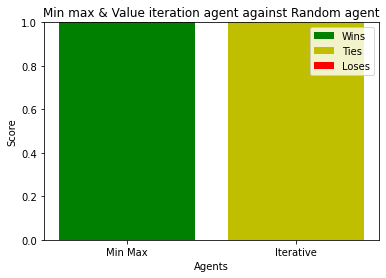

In [168]:

agent_types = [FourInARowRandomAgent,FourInARowSemiRandomAgent] 
creator = FourInARowGraphCreator()


# Difference Min Max agent Vs the Value iteration agent agenst a random opponent
creator.min_max_game(FourInARowRandomAgent, "Min max & Value iteration agent against Random agent")

#### 4.5.1 Random agents

The MinMax agents tends to preform better against random against compared to the Iterative value agent.

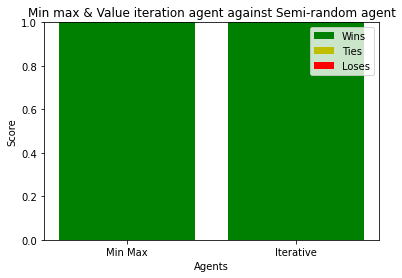

In [ ]:
creator.min_max_game(FourInARowSemiRandomAgent, "Min max & Value iteration agent against Semi-random agent")

#### 4.5.2 Influence - start player
As expected the random agents still preform worst against non-random agents even when they can play first

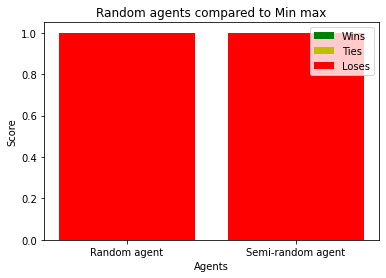

In [172]:
creator.random_graph(FourInARowMinMaxAgent, "Random agents compared to Min max")